In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.shape

(1338, 8)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
y = df["insuranceclaim"]
X = df.drop("insuranceclaim",axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [6]:

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [8]:
model = Sequential()
model.add(Dense(16,activation="tanh", input_dim=7))
model.add(Dense(8,activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

In [9]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [10]:
trained_model = model.fit(X_train_ss, y_train, epochs=50,batch_size=32)

Epoch 1/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6233
Epoch 2/50
30/30 [==============================] - 0s 1ms/step - loss: 0.5633
Epoch 3/50
30/30 [==============================] - 0s 897us/step - loss: 0.5112
Epoch 4/50
30/30 [==============================] - 0s 1ms/step - loss: 0.4640
Epoch 5/50
30/30 [==============================] - 0s 896us/step - loss: 0.4256
Epoch 6/50
30/30 [==============================] - 0s 896us/step - loss: 0.3951
Epoch 7/50
30/30 [==============================] - 0s 1ms/step - loss: 0.3725
Epoch 8/50
30/30 [==============================] - 0s 931us/step - loss: 0.3562
Epoch 9/50
30/30 [==============================] - 0s 931us/step - loss: 0.3445
Epoch 10/50
30/30 [==============================] - 0s 965us/step - loss: 0.3362
Epoch 11/50
30/30 [==============================] - 0s 966us/step - loss: 0.3293
Epoch 12/50
30/30 [==============================] - 0s 897us/step - loss: 0.3239
Epoch 13/50
30/30 [==============

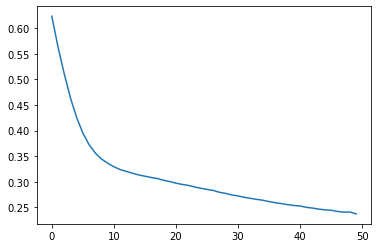

In [11]:
plt.plot(trained_model.history["loss"])

In [12]:
y_pred = model.predict(X_test_ss)
y_pred = np.where(y_pred >= 0.5,1,0)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       157
           1       0.95      0.89      0.92       245

    accuracy                           0.90       402
   macro avg       0.90      0.91      0.90       402
weighted avg       0.91      0.90      0.90       402

